In [1]:
import pandas as pd

taxi = pd.read_csv('data/train.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ddf28cac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8dded97748>]], dtype=object)

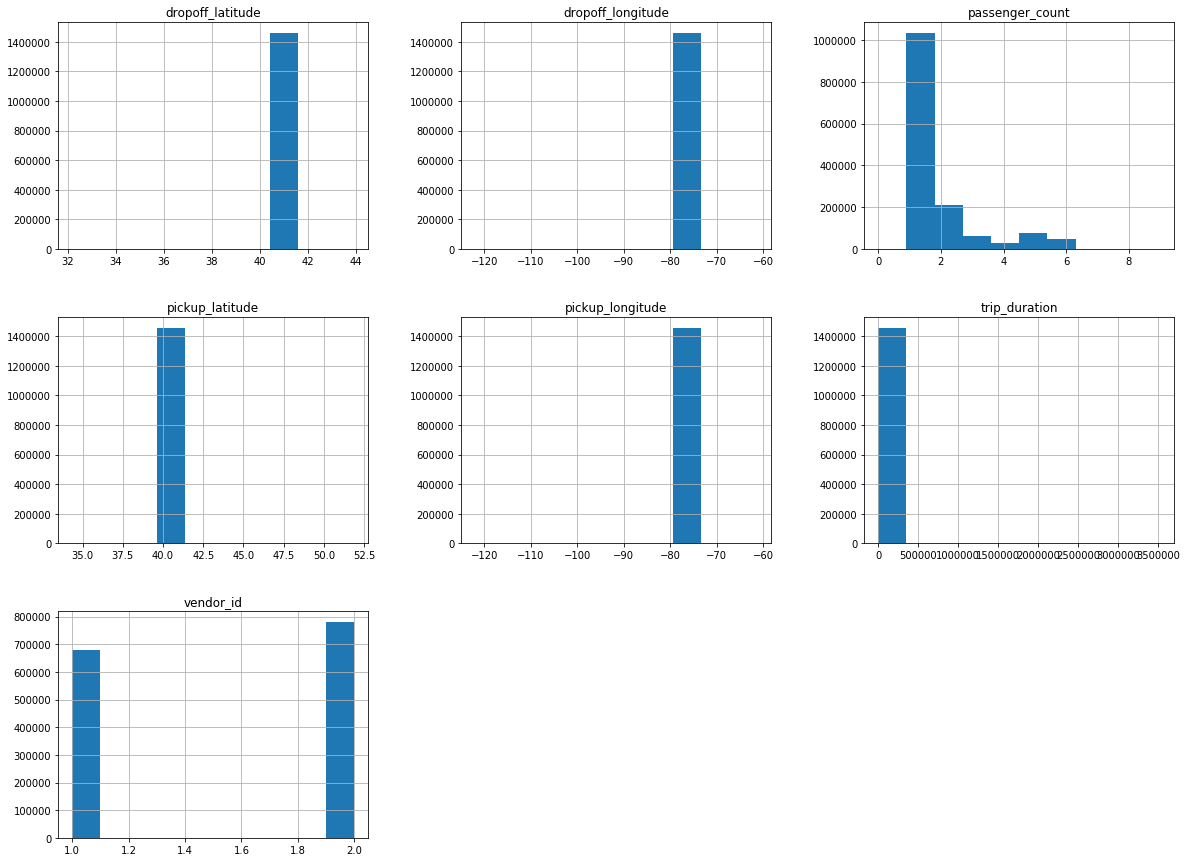

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
taxi.hist(figsize=(20,15))

In [3]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


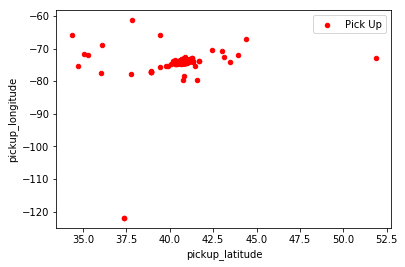

In [5]:
taxi.plot(kind="scatter", x="pickup_latitude", y="pickup_longitude", color='r', label="Pick Up")

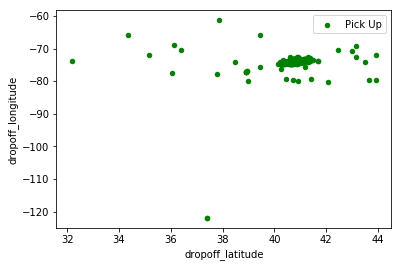

In [6]:
taxi.plot(kind="scatter", x="dropoff_latitude", y="dropoff_longitude", color='g', label="Pick Up")

In [7]:
taxi['dropoff_latitude'][10]

40.732990264892578

In [8]:
taxi['dropoff_longitude'][10]

-74.002227783203125

In [9]:
taxi['pickup_datetime'][10]

'2016-05-10 22:08:41'

In [10]:
pd.to_datetime(taxi['pickup_datetime'])[10].value

1462918121000000000

In [11]:
taxi['pickup_datetime_int64'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime_int64'] = pd.to_datetime(taxi['dropoff_datetime'])

(array([ 735963.95833333,  735964.08333333,  735964.20833333,
         735964.33333333,  735964.45833333,  735964.58333333,
         735964.70833333,  735964.83333333,  735964.95833333]),
 <a list of 9 Text xticklabel objects>)

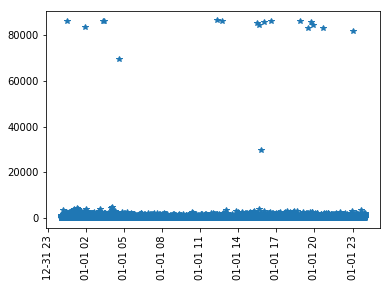

In [12]:
import datetime

pickup_before_1_2_2016 = taxi[taxi['pickup_datetime_int64'] < datetime.datetime(2016, 1, 2)]
pickup_before_1_2_2016_short_trip = pickup_before_1_2_2016[pickup_before_1_2_2016['trip_duration'] < 100000]
pickup_time = pd.Series(pickup_before_1_2_2016_short_trip['pickup_datetime_int64'])
r = pd.Series(pickup_before_1_2_2016_short_trip['trip_duration'])

df = pd.DataFrame({'Pickup Time': pickup_time, 'Trip Duration': r})

plt.plot(df['Pickup Time'], df['Trip Duration'], '*')
plt.xticks(rotation='vertical')

(array([ 735963.95833333,  735964.08333333,  735964.20833333,
         735964.33333333,  735964.45833333,  735964.58333333,
         735964.70833333,  735964.83333333,  735964.95833333]),
 <a list of 9 Text xticklabel objects>)

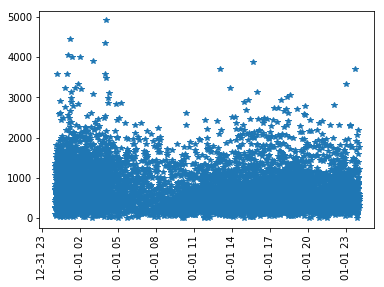

In [13]:
pickup_before_1_2_2016 = taxi[taxi['pickup_datetime_int64'] < datetime.datetime(2016, 1, 2)]
pickup_before_1_2_2016_short_trip = pickup_before_1_2_2016[pickup_before_1_2_2016['trip_duration'] < 20000]
pickup_time = pd.Series(pickup_before_1_2_2016_short_trip['pickup_datetime_int64'])
r = pd.Series(pickup_before_1_2_2016_short_trip['trip_duration'])

df = pd.DataFrame({'Pickup Time': pickup_time, 'Trip Duration': r})

plt.plot(df['Pickup Time'], df['Trip Duration'], '*')
plt.xticks(rotation='vertical')

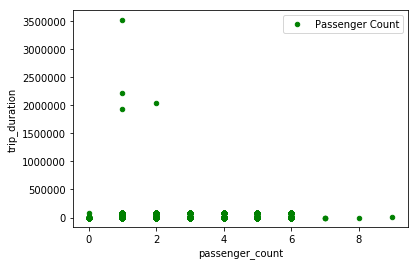

In [14]:
taxi.plot(kind="scatter", x="passenger_count", y="trip_duration", color='g', label="Passenger Count")

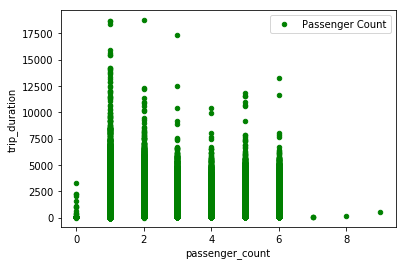

In [15]:
taxi[taxi['trip_duration'] < 20000].plot(kind="scatter", x="passenger_count", y="trip_duration", color='g', label="Passenger Count")

In [17]:
from data_cleaning import DistanceAdder

da = DistanceAdder()
taxi = da.fit_transform(taxi)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
id                        1458644 non-null object
vendor_id                 1458644 non-null int64
pickup_datetime           1458644 non-null object
dropoff_datetime          1458644 non-null object
passenger_count           1458644 non-null int64
pickup_longitude          1458644 non-null float64
pickup_latitude           1458644 non-null float64
dropoff_longitude         1458644 non-null float64
dropoff_latitude          1458644 non-null float64
store_and_fwd_flag        1458644 non-null object
trip_duration             1458644 non-null int64
pickup_datetime_int64     1458644 non-null datetime64[ns]
dropoff_datetime_int64    1458644 non-null datetime64[ns]
distance                  1458644 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 155.8+ MB


In [18]:
corr_matrix = taxi.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration        1.000000
distance             0.094777
pickup_longitude     0.026542
vendor_id            0.020304
dropoff_longitude    0.014678
passenger_count      0.008471
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
Name: trip_duration, dtype: float64

In [40]:
import numpy as np
helper = np.vectorize(lambda x: x.timestamp())
taxi['pickup_timestamp'] = helper(taxi['pickup_datetime_int64'].dt.to_pydatetime())
taxi['dropoff_timestamp'] = helper(taxi['dropoff_datetime_int64'].dt.to_pydatetime())

In [41]:
corr_matrix = taxi.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration        1.000000
distance             0.094777
pickup_longitude     0.026542
vendor_id            0.020304
dropoff_longitude    0.014678
passenger_count      0.008471
dropoff_timestamp    0.007819
pickup_timestamp     0.006644
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
Name: trip_duration, dtype: float64